In [11]:
import math

import matplotlib.pylab as plt
import numpy as np
import pylab

In [59]:
def problem2():
    """
2) Write a short program to generate a sine (or cosine) function 2048 points long. 
Generate exactly 32 or 64 full cycles over this interval. Plot the results and 
add labels to the axes. Always label your axes. Always

Notes:
1 cycle is 2*np.pi, so 64 cycle is T= 32*2*np.pi, or from (-16*2*np.pi, 16*2*np.pi)
"""

In [70]:
x_range= np.linspace(-2*np.pi*16, 2*np.pi*16, 2048)

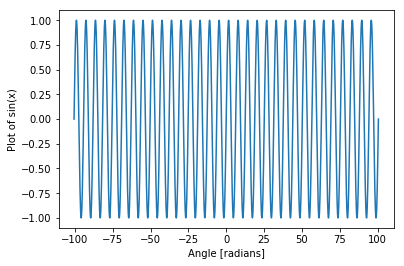

In [71]:
plt.plot(x_range, np.sin(x_range))
plt.xlabel('Angle [radians]')
plt.ylabel('Plot of sin(x)')
plt.axis('tight')
plt.show()

In [60]:
def problem3():
    """
#3 Create two 6x6 matrices, A and B, of any numbers or function you like. Multiply 
A and B using matrix multiplication. Multiply corresponding elements of A and B. 
Plot both results using imagesc and add a colorbar. Change one plot to grayscale 
using colormap.
    """

In [58]:
mat_A = np.arange(36).reshape(6,6)

mat_B = np.arange(10,10+36,1).reshape(6,6)
mat_I = np.identity(6) #identity matrix
mat_A

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [61]:
mat_A * mat_I

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   7.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  14.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  21.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  28.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  35.]])

In [75]:
mat_A * matrix_B

array([[   0,   11,   24,   39,   56,   75],
       [  96,  119,  144,  171,  200,  231],
       [ 264,  299,  336,  375,  416,  459],
       [ 504,  551,  600,  651,  704,  759],
       [ 816,  875,  936,  999, 1064, 1131],
       [1200, 1271, 1344, 1419, 1496, 1575]])

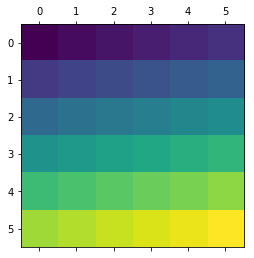

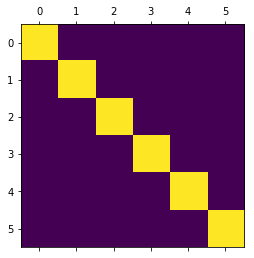

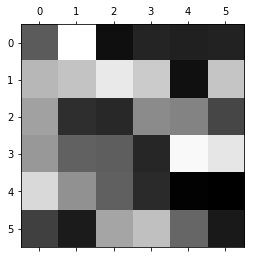

In [95]:
def samplemat(dims):
    """
    Make a matrix with all zeros and increasing elements on the diagonal
    Source: https://matplotlib.org/examples/pylab_examples/matshow.html
    """
    aa = np.zeros(dims)
    for i in range(min(dims)):
        aa[i, i] = i
    return aa

#----------------------------
def create_color_map(x_dim, y_dim, matrix):
    """Generates a color map with given figure dimensions and a matrix"""
    plt.matshow(matrix)
    
create_color_map(12, 12, mat_A)
create_color_map(12, 12, mat_I)    

#random matrix
mat_R = np.random.rand(6, 6)

# fignum = specified figure number
# generate random matrix in gray scale
plt.matshow(np.random.rand(6, 6), fignum=100, cmap=plt.cm.gray)
plt.show()



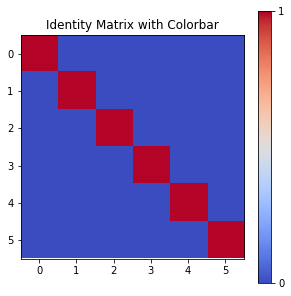

In [120]:
from numpy.random import randn

# Source: https://matplotlib.org/examples/pylab_examples/colorbar_tick_labelling_demo.html
# Used 'imshow' instead of 'matshow'above to create image with color bars

# A. Make plot with vertical (default) colorbar
fig, ax = plt.subplots()
cax = ax.imshow(mat_I, interpolation='nearest', cmap=plt.cm.coolwarm)
ax.set_title('Identity Matrix with Colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[0, 1])
cbar.ax.set_yticklabels(['0', '1'])  # vertically oriented colorbar

plt.show()

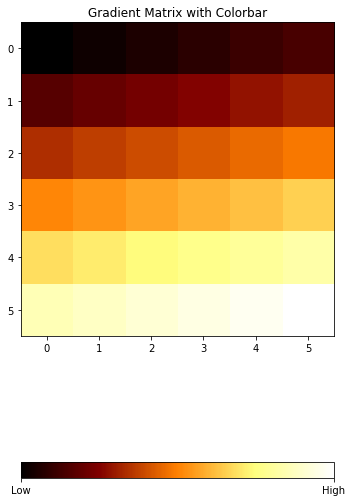

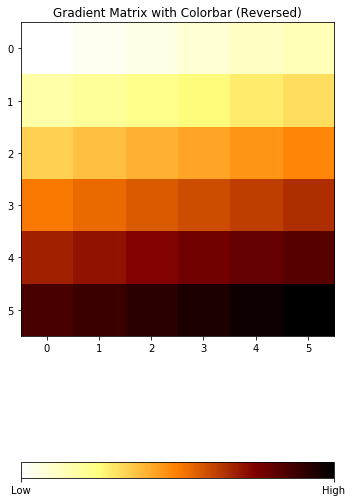

In [154]:
# B. Make plot with horizontal colorbar
# Colormap: https://matplotlib.org/examples/color/colormaps_reference.html
plt.gcf().subplots_adjust(bottom=-0.5)
fig, ax = plt.subplots()
cax = ax.imshow(mat_A, interpolation='nearest', cmap=plt.cm.afmhot)
cbar = fig.colorbar(cax, ticks=[0, np.amax(mat_A)], orientation='horizontal')
cbar.ax.set_xticklabels(['Low', 'High'])  # horizontal colorbar
ax.set_title('Gradient Matrix with Colorbar')

fig, ax = plt.subplots()
cax = ax.imshow(mat_A, interpolation='nearest', cmap=plt.cm.afmhot_r) 
# afmhot_r is reversed color map of afmhot
ax.set_title('Gradient Matrix with Colorbar (Reversed)')

cbar = fig.colorbar(cax, ticks=[0, np.amax(mat_A)], orientation='horizontal')
cbar.ax.set_xticklabels(['Low', 'High'])  # horizontal colorbar
plt.show()

In [61]:
def problem4():
    """ 
The class notes on platforms and orbits includes the following formulas for 
calculating a ground track for a satellite in a circular orbit about a 
spherical earth (don’t worry about converting from geocentric to geodetic 
coordinates). Use this formula to calculate and plot the ground track of any 
remote sensing satellite. The following parameters will produce an exact 
10-day repeat track for the Topex satellite.
    
    Notes:
    -----
    latitude: -180, 180 theta
    longitude: -90, 90 phi
    topex satellite goes about 75 deg north
    plot longitude in x-axis and latitude in y-axis
    """

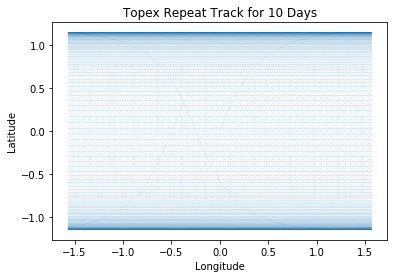

In [55]:
def plot_topex_repeat_track_for_10_days():
    # calculate t(theta)
    t_duration = 10 * 24 * 3600 # 864000 <- duration
    t = np.arange(0, float(t_duration), 1) # time in seconds for 10 days 
    
    # w -> omega
    w_e = 2*np.pi/86164.1
    w_s = 2*np.pi/6745.72
    w_n = w_e - w_s * (10.0/127.0)
    i = 66.01 * (np.pi/180)
    w_e_prime = w_e - w_n
    
    # theta and phi are functions of time
    #latitude
    theta = np.arcsin(np.sin(w_s*t) * np.sin(i))
    # t = (1/w_s)* np.arcsin(np.sin(theta))
           
    # arctan value is (-np.pi/2, np.pi/2)
    phi = np.arctan((-np.sin(w_e_prime*t)*np.cos(w_s*t) + 
                     np.cos(w_e_prime*t)*np.sin(w_s*t)*np.cos(i))/
                    (np.cos(w_e_prime*t)*np.cos(w_s*t) + 
                     np.sin(w_e_prime*t)*np.sin(w_s*t)*np.cos(i)))
    plt.plot(phi, theta, linewidth=0.05)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Topex Repeat Track for 10 Days')
    plt.axis('tight')
    plt.show()
    
plot_topex_repeat_track_for_10_days()
